#Use an API to Retrieve Weather Data and Store the Data in a Dataframe

###First import the necessary libraries
#####I used pandas for the dataframe and seaborn to create a quick visualization of the dataframe

In [ ]:
#import libraries
import requests
import pandas as pd
from datetime import datetime
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


###Create the dataframe and store the API Key
#####(I have hidden my API Key for personal security.)

In [ ]:
#Keys
API_KEY = '*****************************'

In [ ]:
#Create the dataframe for data to be stored in
weather_data_hr = pd.DataFrame(columns=["Date","Hour","Weather_description","Temp(F)","Feels_like(F)","Prob_of_Precip","Humidity(%)","Wind_speed(mph)"])

###Make the API call and return a Json object
#####The lat and lon in the API call are for the town I live in, Arcata, CA!

In [ ]:
#make API call
#return a json
url = "http://api.openweathermap.org/data/2.5/onecall?lat=40.8742&lon=-124.0765&appid="+API_KEY+"&units=imperial"
response = requests.get(url).json()

#####This is a small portion of the json object that gets returned. In this case it is the first set of hourly data from the API. This API allows access to 48 hours of data.

In [ ]:
response['hourly'][0]

{'clouds': 0,
 'dew_point': 48.63,
 'dt': 1643324400,
 'feels_like': 57.99,
 'humidity': 68,
 'pop': 0,
 'pressure': 1022,
 'temp': 59.18,
 'uvi': 0.9,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
   'icon': '01d',
   'id': 800,
   'main': 'Clear'}],
 'wind_deg': 314,
 'wind_gust': 2.73,
 'wind_speed': 2.82}

###Create a For Loop
#####I create a for loop that goes through the response and extracts the variables that we want in our dataframe. Then the data is added to the dataframe.

In [ ]:
for hour in response['hourly']:
  weather_desc = hour['weather'][0]['description']
  temp = hour['temp']
  fl = hour['feels_like']
  pop = hour['pop']
  humidity = hour['humidity']
  wind_speed = hour['wind_speed']


  #make unix dt into formatted dt
  unix_dt = int(hour['dt'])
  dt = datetime.utcfromtimestamp(unix_dt).strftime('%Y-%m-%d %H:%M:%S')

  #split dt into date and hour
  date = str(dt).split(" ")[0]
  hour = str(dt).split(" ")[1]

  #save to pandas dataframe
  weather_data_hr = weather_data_hr.append({'Date':date, 'Hour':hour,'Weather_description': weather_desc,'Temp(F)':temp,'Feels_like(F)':fl,'Prob_of_Precip':pop,'Humidity(%)':humidity,'Wind_speed(mph)':wind_speed}, ignore_index=True)

####Display the first 5 rows of the dataframe to make sure it functions properly

In [ ]:
weather_data_hr.head()

,Date,Hour,Weather_description,Temp(F),Feels_like(F),Prob_of_Precip,Humidity(%),Wind_speed(mph)
0,2022-01-27,23:00:00,clear sky,59.18,57.99,0,68,2.82
1,2022-01-28,00:00:00,clear sky,58.42,57.02,0,65,2.82
2,2022-01-28,01:00:00,clear sky,55.89,54.32,0,67,2.75
3,2022-01-28,02:00:00,clear sky,52.83,51.04,0,69,2.95
4,2022-01-28,03:00:00,clear sky,50.38,48.40,0,70,3.67


####Create a simple line plot to show how to weather will change over the next 48 hours

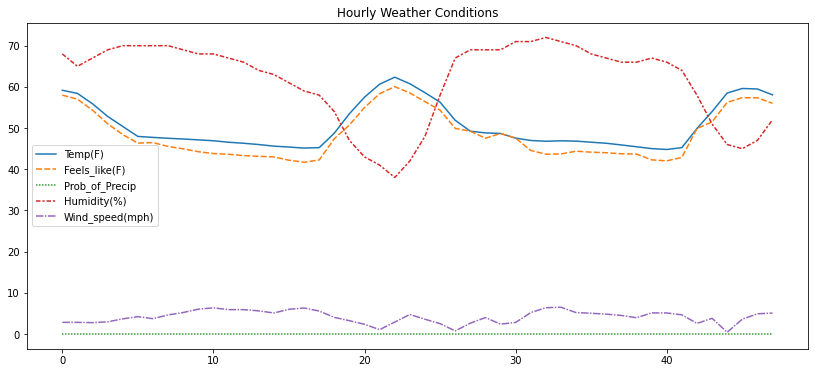

In [ ]:
plt.figure(figsize=(14,6))
plt.title("Hourly Weather Conditions")
sns.lineplot(data = weather_data_hr)